C:\Users\moinm\AppData\Local\Temp\ipykernel_1800\3635722054.py:31: RuntimeWarning: divide by zero encountered in log10
  r_log = np.log10(vek_r)-np.max(np.log10(vek_r))
C:\Users\moinm\AppData\Local\Temp\ipykernel_1800\3635722054.py:32: RuntimeWarning: invalid value encountered in multiply
  coord_cart_r = coord_cart * r_log/10


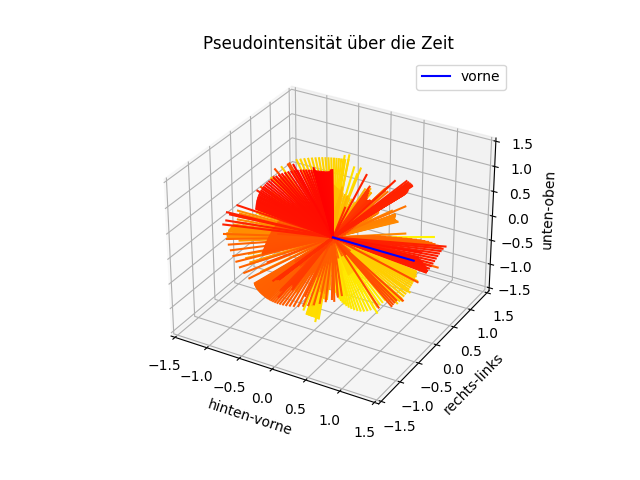

In [1]:
import spaudiopy as spa
import pyfar as pf
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import soundfile as sf
import glob
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib widget


# load only Ambisonics B-Format components
n = 0
HOA_files_b = ["" for x in range(4)]

for i in [f'{i:>02}' for i in range(1, 5)]:
    HOA_files_b[n] = "HOA\HOA_A10p_S00_R00_CH" + i + ".wav"
    n = n+1

MultiSig = spa.io.load_audio(HOA_files_b)
ambi_b = spa.sig.AmbiBSignal.sh_to_b(MultiSig)

# Berechnung der Schalleinfallsrichtungen über Pseudointensität (IRIS)
vek_azi, vek_zen, vek_r = spa.parsa.pseudo_intensity(ambi_b, win_len=21, f_bp = (63,4000)) # win_len = 441 = 1 ms Mittelung
# vek_r = np.log10(np.abs(vek_r))

# Berechnung der Intensitätsvektoren
# coord_ps_i = spa.utils.sph2cart(vek_azi, vek_zen, vek_r)
coord_cart = spa.utils.dir2cart(vek_azi, vek_zen)
r_log = np.log10(vek_r)-np.max(np.log10(vek_r))
coord_cart_r = coord_cart * r_log/10
# coord_cart_r = coord_cart_r - np.max(20* np.log10(vek_r))

## Plot der Intensitätsvektoren
# Definition des Evaluationszeitraumes
t_start = int(ambi_b.fs * 0.015)
t_ev = int(ambi_b.fs * 0.025)
# t_ev2 = int(ambi_b.fs * 0.6)

# Extraktion der Vektorendpunkte (benötigt, für Zeitoptimierung)
x_pl = coord_cart_r[0]*(-1)
y_pl = coord_cart_r[1]*(-1)
z_pl = coord_cart_r[2]*(-1)

# Plot der Vektoren
fig = plt.figure()
ax = Axes3D(fig)
# ax = plt.axes(projection='3d')
# color = np.linspace(0.0,1.0,t_ev2)# np.arange(t_ev2)/t_ev2

def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c2='red' #blue
c1='yellow' #green
n = t_ev

#-------------------------------------------------------
# for i in range(t_ev, t_ev2):
#     ax.plot3D([0,x_pl[i]],[0,y_pl[i]],[0,z_pl[i]], c = colorFader(c1,c2,i/n))#'orange')

# for i in range(0, t_ev):
#     ax.plot3D([0,x_pl[i]],[0,y_pl[i]],[0,z_pl[i]], c = colorFader(c1,c2,i/n))#'red')

# ax.plot3D([0,10],[0,0],[0,0],'green')

# ax.axes.set_xlim3d(left=-5, right=5)
# ax.axes.set_ylim3d(bottom=-5, top=5)
# ax.axes.set_zlim3d(bottom=-5, top=5)
# ax.set_title("3D plot") 
# ax.set_xlabel('x-axis') 
# ax.set_ylabel('y-axis') 
# ax.set_zlabel('z-axis') 
#-------------------------------------------------------

ax = plt.axes(projection='3d')
# for i in range(t_ev, t_ev2):
#     ax.plot3D([0,x_pl[i]],[0,y_pl[i]],[0,z_pl[i]],c = colorFader(c1,c2,i/n))

for i in range(0, t_ev):
    ax.plot3D([0,x_pl[(i-t_ev)*4]],[0,y_pl[(i-t_ev)*4]],[0,z_pl[(i-t_ev)*4]],c = colorFader(c1,c2,i/n))

ax.plot3D([0,1.2],[0,0],[0,0],'blue', label =  'vorne')

ax.axes.set_xlim3d(left=-1.5, right=1.5)
ax.axes.set_ylim3d(bottom=-1.5, top=1.5)
ax.axes.set_zlim3d(bottom=-1.5, top=1.5)
ax.set_title("Pseudointensität über die Zeit") 
ax.set_xlabel('hinten-vorne') 
ax.set_ylabel('rechts-links') 
ax.set_zlabel('unten-oben')
ax.legend()

#-------------------------------------------------------

# # Plot der Schalleinfallsrichtungen in azi/zen/r/t
# spa.plot.doa(vek_azi[t_start:t_ev], vek_zen[t_start:t_ev], vek_r[t_start:t_ev],  fs = ambi_b.fs)
# spa.plot.doa(vek_azi[t_ev:t_ev2], vek_zen[t_ev:t_ev2],vek_r[t_ev:t_ev2], fs = ambi_b.fs)

# ambi_b_signal = ambi_b.get_signals()
# ambi_b_time = np.linspace(0,len(ambi_b_signal[0])/ambi_b.fs,len(ambi_b_signal[0]))
# fig, ax1 = plt.subplots()
# ax1.plot(ambi_b_time[0:t_ev2], 10*np.log10(ambi_b_signal[0, 0:t_ev2]**2))
# ax1.set_xlabel('t in s')
# ax1.set_ylabel('L in dB')
# bzw. über SDM
# ... viele Wege führen nach Rom und manchmal sogar zur CD_ROM